# Exploratory Data Analysis of Video Game Data

In this notebook we will explore the data through visualization, fill any missing values and look into feature that we hypothesised may have corrilation with our game popularity as well as explore what we will define as a "popular" video game.

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns


import requests
import numpy as np
import pandas_profiling
import tkinter
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('tkagg')

# I. Steam Purchase Data

Note: Hours column is all 1's, we're going to use this df to see game popularity by number of steam purchases, and later check if this matches up with data from other data sets.

In [2]:
purchase = pd.read_csv("./csv_files/steam_data_purchase_clean.csv", index_col=0)

In [3]:
purchase.head()

,UserID,Game,Purchase/Play,Hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
2,151603712,Fallout 4,purchase,1.0
4,151603712,Spore,purchase,1.0
6,151603712,Fallout New Vegas,purchase,1.0
8,151603712,Left 4 Dead 2,purchase,1.0


In [4]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129511 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         129511 non-null  int64  
 1   Game           129511 non-null  object 
 2   Purchase/Play  129511 non-null  object 
 3   Hours          129511 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.0+ MB


In [5]:
purchase.describe()

,UserID,Hours
count,1.295110e+05,129511.0
mean,1.024447e+08,1.0
std,7.236442e+07,0.0
min,5.250000e+03,1.0
25%,4.550738e+07,1.0
50%,8.605570e+07,1.0
75%,1.542307e+08,1.0
max,3.099031e+08,1.0


In [6]:
purchase['Game'].value_counts()

Dota 2                             4841
Team Fortress 2                    2323
Unturned                           1563
Counter-Strike Global Offensive    1412
Half-Life 2 Lost Coast              981
                                   ... 
Abandoned Chestnut Lodge Asylum       1
Wooden Sen'SeY                        1
Super 3-D Noah's Ark                  1
1701 A.D. Sunken Dragon               1
Warring States                        1
Name: Game, Length: 5155, dtype: int64

In [7]:
purchase['Game'].value_counts().describe()

count    5155.000000
mean       25.123375
std       101.572586
min         1.000000
25%         2.000000
50%         5.000000
75%        18.000000
max      4841.000000
Name: Game, dtype: float64

In [8]:
len(pd.unique(purchase['Game']))

5155

There are 5155 different games listed in this data set with a mean 25 sales and a standard deviation of 102 sales. 

Next I want to look at the distribution of these sales, to see what we can decide on as a good base line for determining if a game is popular or not.

In [9]:

pivoted_purchase = purchase.pivot_table(index='Game', values='Hours', aggfunc='count')
pivoted_purchase

,Hours
Game,
007 Legends,1
0RBITALIS,3
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),7
10 Second Ninja,6
"10,000,000",1
...,...
sZone-Online,102
samurai_jazz,1
the static speaks my name,13


In [10]:
pivoted_purchase.describe()

,Hours
count,5155.000000
mean,25.123375
std,101.572586
min,1.000000
25%,2.000000
50%,5.000000
75%,18.000000
max,4841.000000


Above confirmed that the pivot that was just done does still give us the same numbers as what we were seeing in the dataframe.

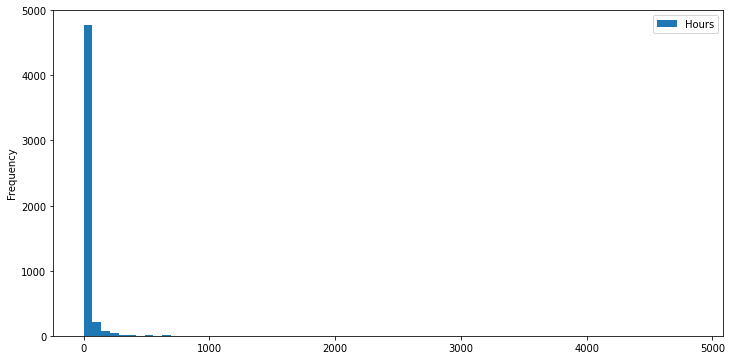

In [11]:
%matplotlib inline
pivoted_purchase.plot(kind='hist', bins=70, figsize=[12,6])
plt.show()

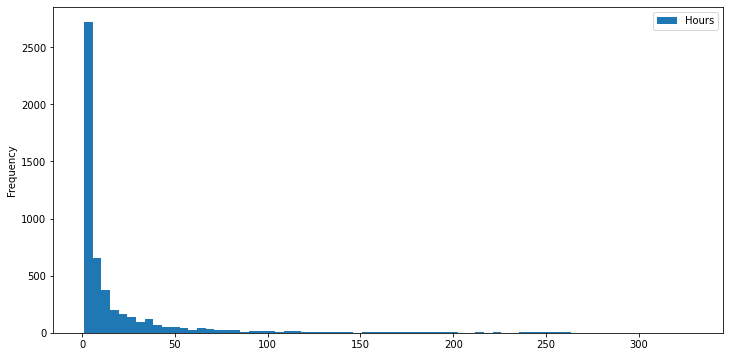

In [12]:
std_purchase = pivoted_purchase['Hours'].std()
mean_purchase = pivoted_purchase['Hours'].mean()
purchase_cut_off = mean_purchase + 3*std_purchase

pivoted_purchase[pivoted_purchase['Hours'] < purchase_cut_off].plot(kind='hist', bins=70, figsize=[12,6])
plt.show()

In [13]:
pivoted_purchase[pivoted_purchase['Hours'] < purchase_cut_off].describe()

,Hours
count,5106.000000
mean,18.751665
std,37.829415
min,1.000000
25%,2.000000
50%,5.000000
75%,17.000000
max,329.000000


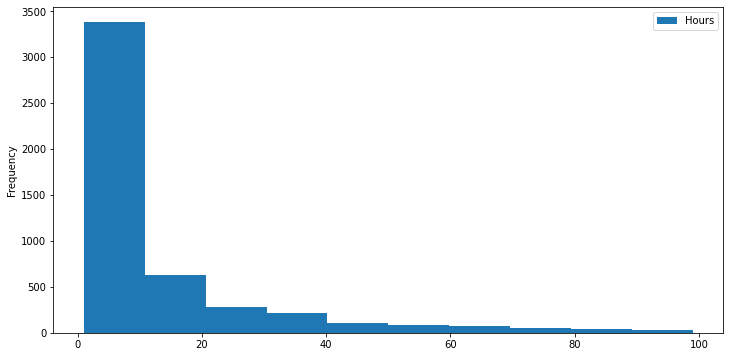

In [14]:
pivoted_purchase[pivoted_purchase['Hours'] < 100].plot(kind='hist', bins=10, figsize=[12,6])
plt.show()

Our data appears to be very skewed on sales. I don't believe this data set will be a good determinate for popularity as the analysis suggests that our game could be popular if we reach 17 sales.

# II. Steam Play Data

In this data set we intend to look at the hours each game has been played to see if that would be a better determinate for game popularity

In [15]:
play = pd.read_csv("./csv_files/steam_data_play_clean.csv", index_col=0)
play.head()

,UserID,Game,Purchase/Play,Hours
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9


In [16]:
play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70489 entries, 1 to 199999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UserID         70489 non-null  int64  
 1   Game           70489 non-null  object 
 2   Purchase/Play  70489 non-null  object 
 3   Hours          70489 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [17]:
play.describe()

,UserID,Hours
count,7.048900e+04,70489.000000
mean,1.058812e+08,48.878063
std,7.150365e+07,229.335236
min,5.250000e+03,0.100000
25%,4.934256e+07,1.000000
50%,9.169067e+07,4.500000
75%,1.556738e+08,19.100000
max,3.099031e+08,11754.000000


In [18]:
play['Game'].value_counts()

Dota 2                               4841
Team Fortress 2                      2323
Counter-Strike Global Offensive      1377
Unturned                             1069
Left 4 Dead 2                         801
                                     ... 
Hook                                    1
Dustoff Heli Rescue                     1
Reaper - Tale of a Pale Swordsman       1
Shiny The Firefly                       1
Darkstone                               1
Name: Game, Length: 3600, dtype: int64

In the first application of .describe() we are analyzing each instance of hours playing a game seperately. We can see that this will be fairly skewed just by seeing the mean as 48.9 hours versus the median of 4.5 hours. Next I would like to see if this remains true if we take the average hours played grouped by the game name

In [19]:
play.drop(columns='UserID', inplace=True)
avg_hr_play = play.groupby('Game').mean()
avg_hr_play.head()

,Hours
Game,
007 Legends,0.70
0RBITALIS,0.40
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),4.00
10 Second Ninja,2.95
"10,000,000",3.60


In [20]:
avg_hr_play.describe()

,Hours
count,3600.000000
mean,13.331637
std,39.121551
min,0.100000
25%,1.493651
50%,3.900000
75%,10.758667
max,1295.000000


<AxesSubplot:ylabel='Frequency'>

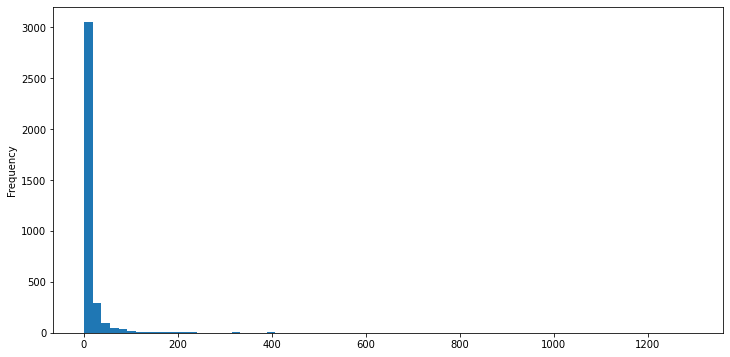

In [21]:
avg_hr_play['Hours'].plot(kind='hist', bins=70, figsize=[12,6])

In [22]:
mean_hr_plays = avg_hr_play['Hours'].mean()
std_hr_play = avg_hr_play['Hours'].std()
cut_off = mean_hr_plays + 3*std_hr_play

In [23]:
trim_avg_hr_play = avg_hr_play[avg_hr_play['Hours']<cut_off]

{'whiskers': [<matplotlib.lines.Line2D at 0x1c01f130>,
 'caps': [<matplotlib.lines.Line2D at 0x1c01f460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c00e6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c01f7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c01f9b8>],
 'means': []}

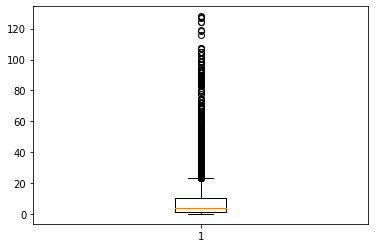

In [24]:
plt.boxplot(trim_avg_hr_play['Hours'])

<AxesSubplot:ylabel='Frequency'>

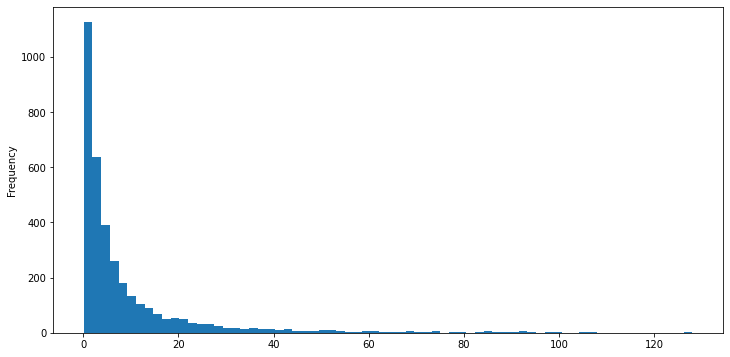

In [25]:
trim_avg_hr_play['Hours'].plot(kind='hist', bins=70, figsize=[12,6])

In [26]:
trim_avg_hr_play.describe()

,Hours
count,3541.000000
mean,9.590383
std,16.122948
min,0.100000
25%,1.437500
50%,3.776923
75%,10.148352
max,128.000000


Looking at these two sets (purchase and play) it's difficult to place a point to determine a video game as "popular", with sales we said we could determine 17 sales the video game was popular since it was more popular than 75% of data, similarly using the 75% cut off, we could say a game is popular with only 10 hours of game play. The 10 Hours isn't as strange as the 17 sales. I am curious to look at the corrilations of these. In theory we should have all the same video games in these two data sets since we seperated them from the same set previously, we have just aggragated the data.

## Merging Purchase and Play Data

We plan to merge these two data sets back together to see if there is a corrilation between the sales and the hours of play.

In [27]:
merge_purchase_play = pivoted_purchase.merge(avg_hr_play, how='inner', on='Game')
merge_purchase_play.head()

,Hours_x,Hours_y
Game,,
007 Legends,1,0.70
0RBITALIS,3,0.40
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),7,4.00
10 Second Ninja,6,2.95
"10,000,000",1,3.60


In [28]:
merge_purchase_play.rename(columns={"Hours_x": "Purchase", "Hours_y": "Hours"}, inplace=True)

In [29]:
merge_purchase_play.corr()

,Purchase,Hours
Purchase,1.000000,0.156211
Hours,0.156211,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Purchase'>

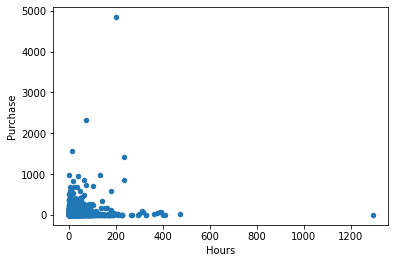

In [30]:
merge_purchase_play.plot.scatter(x='Hours', y='Purchase')

In [31]:
mean_hr = merge_purchase_play['Hours'].mean()
std_hr = merge_purchase_play['Hours'].std()
cutoff = mean_hr + std_hr * 3
trim_merged = merge_purchase_play[merge_purchase_play['Hours']<cutoff]

mean_purchase = merge_purchase_play['Purchase'].mean()
std_purchase = merge_purchase_play['Purchase'].std()
cutoff = mean_purchase + std_purchase * 3
trim_merged = merge_purchase_play[merge_purchase_play['Purchase']<cutoff]

trim_merged.head()

,Purchase,Hours
Game,,
007 Legends,1,0.70
0RBITALIS,3,0.40
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),7,4.00
10 Second Ninja,6,2.95
"10,000,000",1,3.60


<AxesSubplot:xlabel='Hours', ylabel='Purchase'>

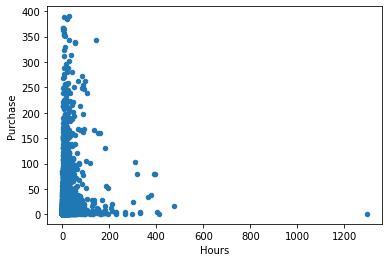

In [32]:
trim_merged.plot.scatter(x='Hours', y='Purchase')

In [33]:
trim_merged.corr()

,Purchase,Hours
Purchase,1.000000,0.096177
Hours,0.096177,1.000000


There does not appear to be any corrilation between the hours spent playing a game and the number of purchases, even when the outliers are removed from the data set.

## Video Game Data 2016 Sales

In [34]:
vg_sales_2016_w_scores = pd.read_csv(r"./csv_files/Video_Games_Sales_as_at_22_Dec_2016.csv")
vg_sales_2016_w_scores.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
vg_sales_2016_w_scores.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [36]:
vg_sales_2016_w_scores.shape

(16719, 16)

Let's drop the rows of missing Name, Genre, and publisher, since these are such a small percentage of the data

In [37]:
vg_sales_2016_w_scores.dropna(subset= ['Name', 'Genre', 'Publisher'], inplace=True)
vg_sales_2016_w_scores.isna().sum()

Name                  0
Platform              0
Year_of_Release     247
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8530
Critic_Count       8530
User_Score         9079
User_Count         9079
Developer          6576
Rating             6720
dtype: int64

In [38]:
vg_sales_2016_w_scores.shape

(16663, 16)

The rows missing the Year_of_Release appears to be about 1.5% of our data. For the sake of this project, we will drop this row as well.

In [39]:
vg_sales_2016_w_scores.dropna(subset= ['Year_of_Release'], inplace=True)
vg_sales_2016_w_scores.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         8955
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

Now about half our data is missing the scores, Rating, and Developer. I want to see if seperating out these by one of the columns will catch all of the missing values, if so we make look at the scores with out this set. However first I want to analyze the data ignoring the columns with missing values.

In [40]:
sales_no_scores = vg_sales_2016_w_scores.drop(columns=['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], inplace=False)
sales_no_scores.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [41]:
vg_sales_2016_w_scores.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [42]:
sales_no_scores.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,1.000000,-0.092346,0.003922,-0.168614,0.037686,-0.076337
NA_Sales,-0.092346,1.000000,0.766539,0.451175,0.638502,0.941238
EU_Sales,0.003922,0.766539,1.000000,0.435877,0.722679,0.901665
JP_Sales,-0.168614,0.451175,0.435877,1.000000,0.291489,0.613305
Other_Sales,0.037686,0.638502,0.722679,0.291489,1.000000,0.748907
Global_Sales,-0.076337,0.941238,0.901665,0.613305,0.748907,1.000000


The Year_of_Release does not appear to corrilate with sales. I attempted get_dummies, but there appears to be too many categories to do all of the columns at once, so I will be doing them seperately.

In [43]:
dummy_sales_platform = pd.get_dummies(sales_no_scores, columns=['Platform'])
dummy_sales_platform.shape

(16416, 40)

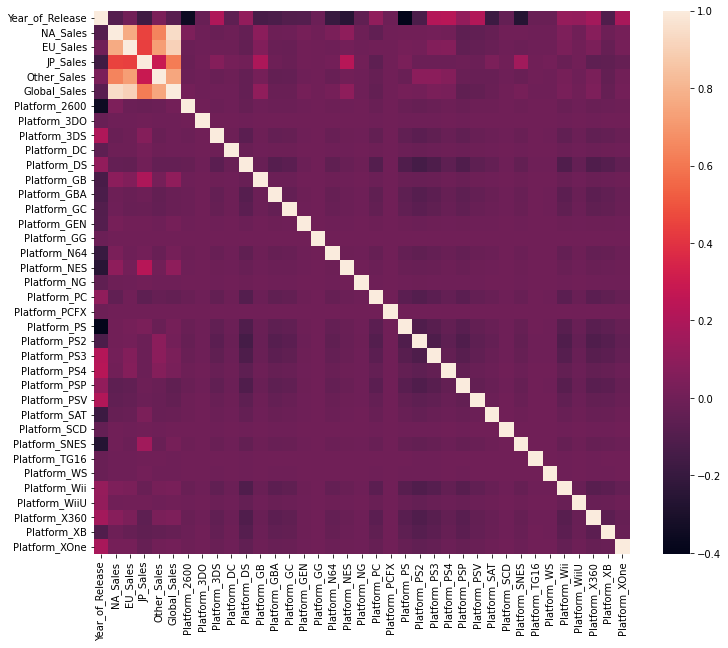

In [44]:
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_platform.corr());

The platforms appear most corrilated with sales in Japan, and the platforms of note are: SNES (Super Nintendo Entertainment System), NES (Nintendo Entertainment System), and GameBoy. Note however, all three of these are outdated gaming systems that no longer have new game releases, so this isn't as useful to us right now.

In [45]:
dummy_sales_genre = pd.get_dummies(sales_no_scores, columns=['Genre'])
dummy_sales_genre.shape

(16416, 21)

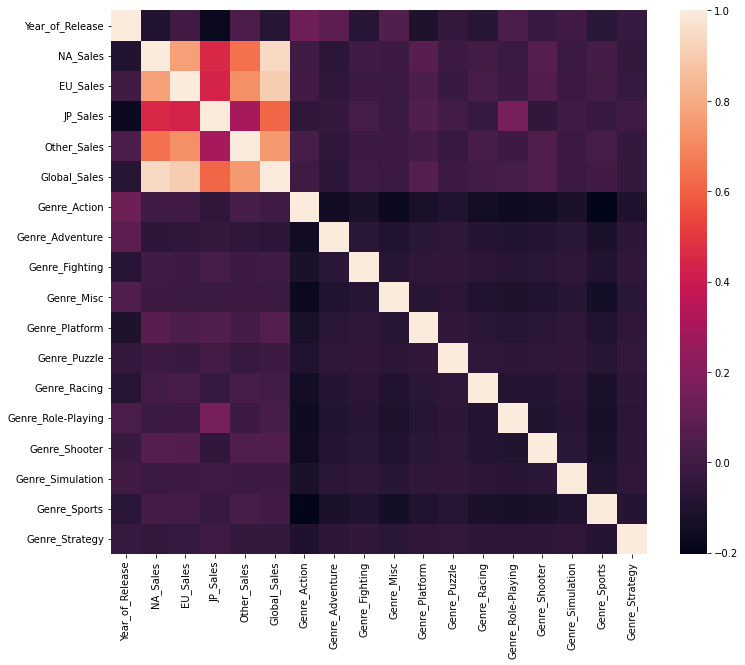

In [46]:
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre.corr());

It appears the Role-Playing Genre may have a slight corrilation with sales in Japan. However id does not appear that this corrilation continues for North America, Europe, Other, or Global. However Platformers do appear slightly corrilated with all of the sales.

In [47]:
dummy_sales_publisher = pd.get_dummies(sales_no_scores, columns=['Publisher'])
dummy_sales_publisher.shape

(16416, 589)

This appears to be extremely large. In addition the publisher is not necessiarily something under a game designer's control, so we will leave it out for now.

In [48]:
dummy_sales_genre_platform = pd.get_dummies(sales_no_scores, columns=['Genre','Platform'])
dummy_sales_genre_platform.shape

(16416, 51)

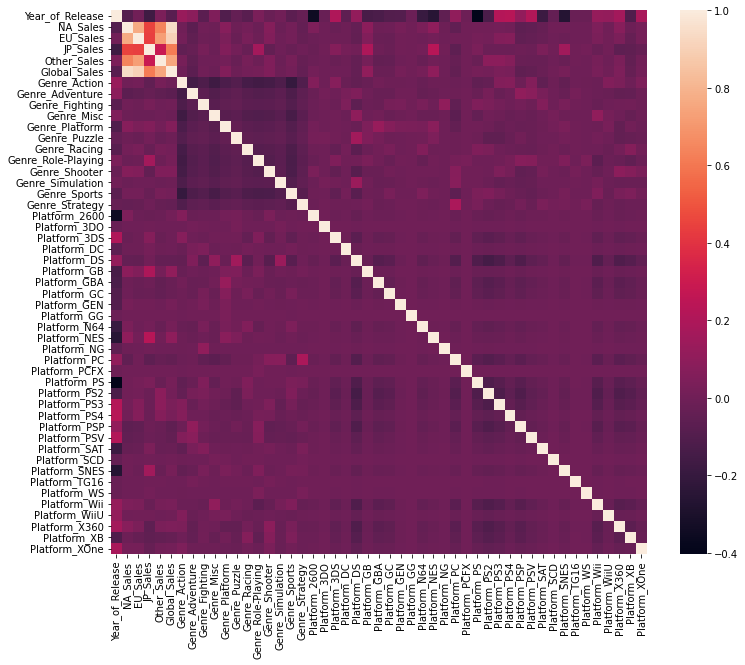

In [49]:
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre_platform.corr());

For the sake of looking at modern platforms and making the heat map more legible I will be dropping the columns relating to DS, GameBoy, GameBoy Advanced, Nintendo 64, Nintendo Entertainment System, PlayStation, PlayStation 2, PlayStation 3, Super Nintendo Entertainment System, Wii, and XBox

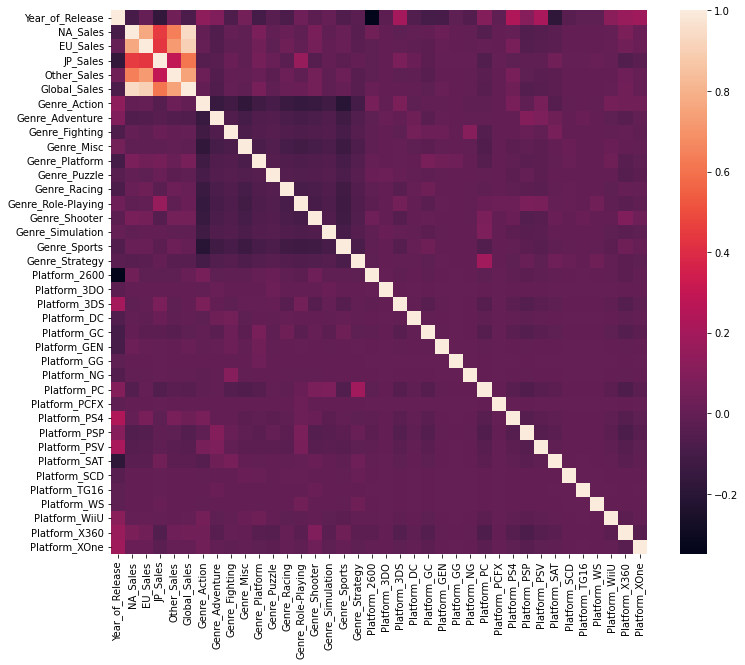

In [50]:
dummy_sales_genre_platform.drop(columns=['Platform_DS', 'Platform_GB', 'Platform_GBA', 'Platform_N64', 'Platform_NES', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_SNES', 'Platform_Wii', 'Platform_XB'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre_platform.corr());

Though I'm not familiar with 2600 and SAT, their negative corrilation with Year_of_Release, so we'll drop them as well.

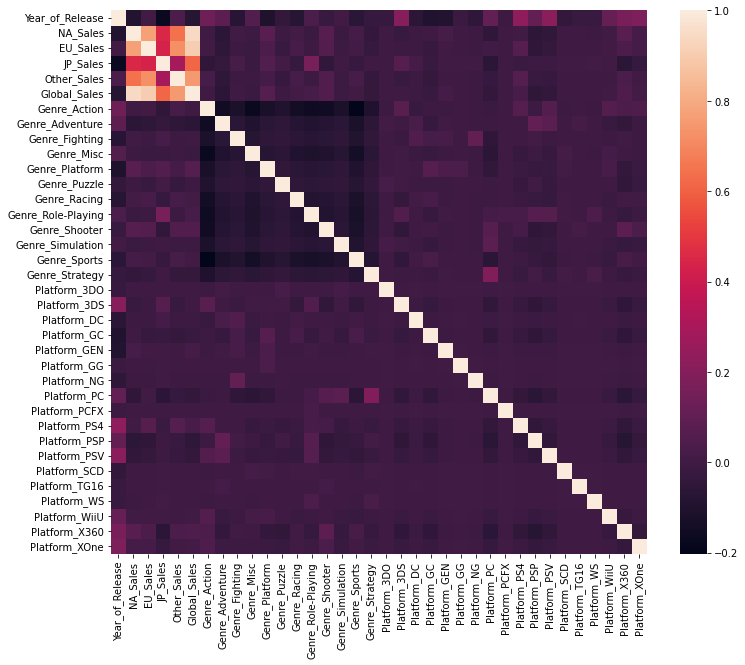

In [51]:
dummy_sales_genre_platform.drop(columns=['Platform_2600', 'Platform_SAT'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre_platform.corr());

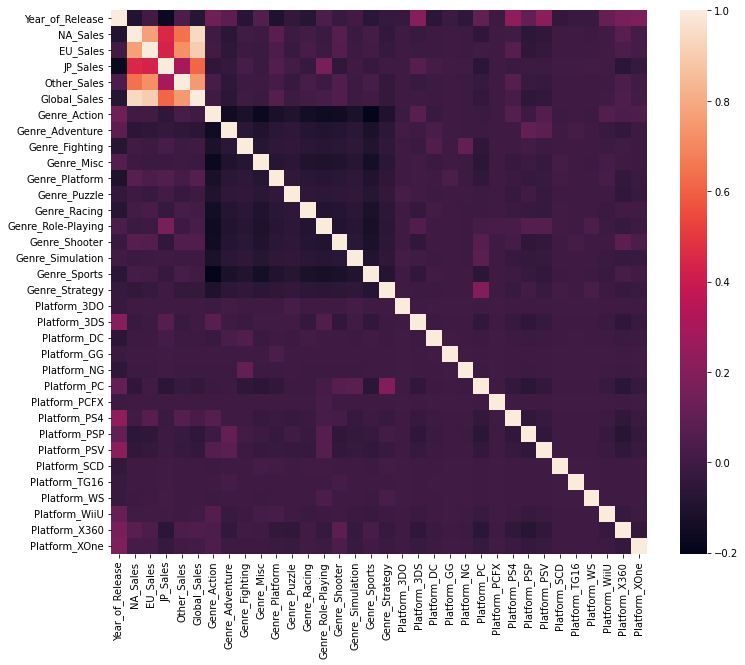

In [52]:
dummy_sales_genre_platform.drop(columns=['Platform_GC', 'Platform_GEN'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre_platform.corr());

Some interesting notes from this data set is that Strategy games seem to be slightly corrilated with PC gamers, Shooters are slightly corrilated between XBox 360 and PC, Adventure is corrilated between the PSP and the PS Vita, and others. These slight corrilations all make sense, though they don't appear strongly corrilated with sales. Next I want to do a similar analysis of the Data with the Rows that have user and critic scores

In [53]:
vg_sales_2016_w_scores.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [54]:
sales_and_scores = vg_sales_2016_w_scores.dropna(axis=0)
sales_and_scores.shape

(6825, 16)

In [55]:
sales_and_scores.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

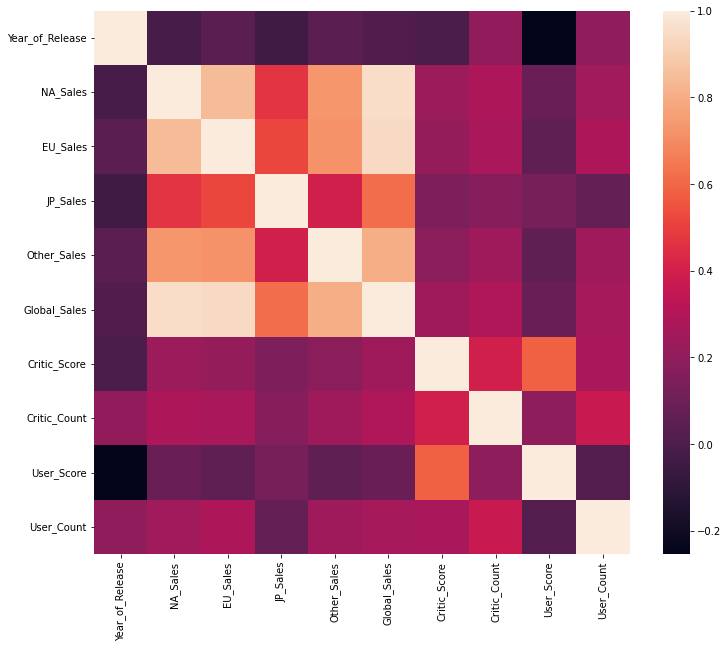

In [56]:
plt.subplots(figsize=(12,10))
sns.heatmap(sales_and_scores.corr());

The first thing of note is that the Critic_Score and User_Score are strongly corrilated, which is good, we don't want those not corrilated. We will als note that critic score is slightly corrilated with North American and European sales. Now we will do the same corrilation analysis as we did with the last set, but jump straight to the platform and genre dummies.

In [57]:
dummy_sales_scores = pd.get_dummies(sales_and_scores, columns=['Genre','Platform', 'Rating'])
dummy_sales_scores.shape

(6825, 49)

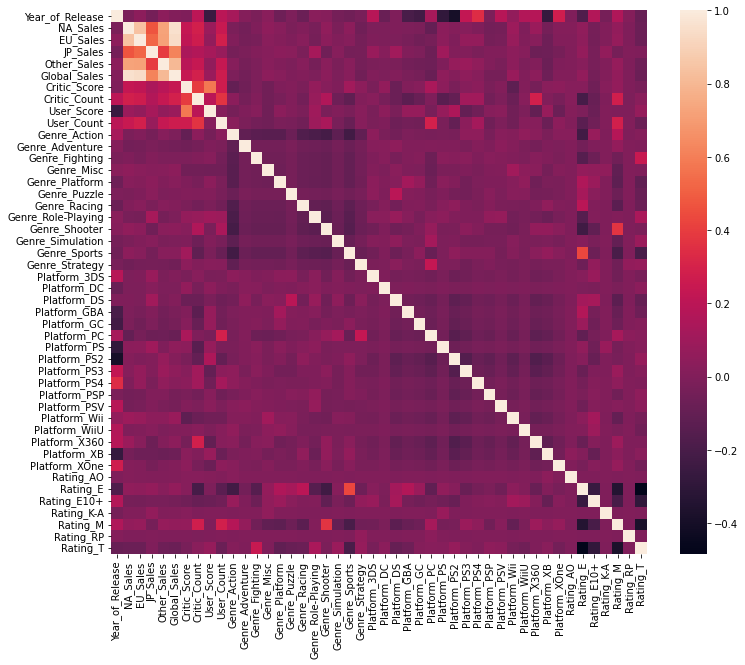

In [58]:
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_scores.corr());

Let's drop the outdated platforms as we did before, something to note: 'Platform_GB',  'Platform_N64',  'Platform_NES',  'Platform_SNES',  'Platform_GEN',  'Platform_2600', and 'Platform_SAT' aren't in this set. This makes sense as these are older game systems, and previously I had hypothesized that the missing values in the Scores was corrilated with the year of release, and this more or less confirms that.

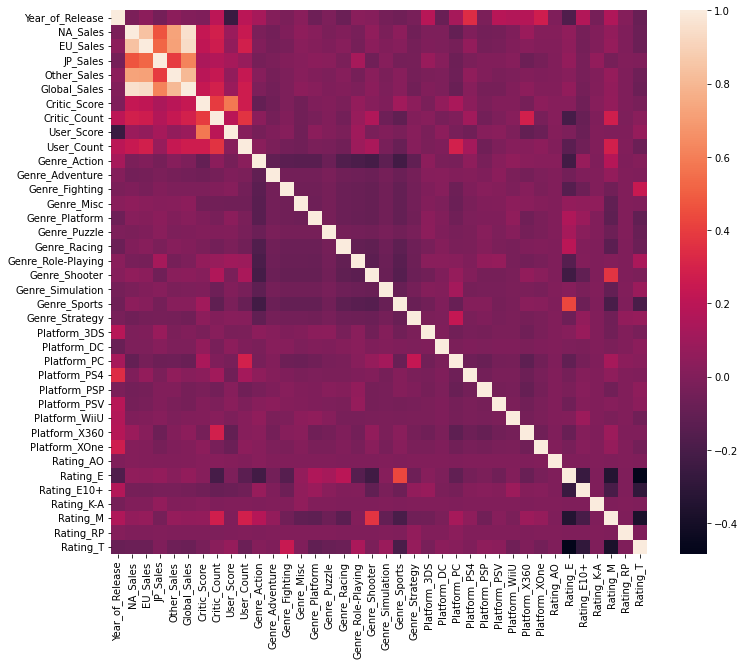

In [59]:
dummy_sales_scores.drop(columns=['Platform_DS', 'Platform_GBA', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_Wii', 'Platform_XB', 'Platform_GC'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_scores.corr());

Let's also drop sales as we've already looked at the corrilation of sales already

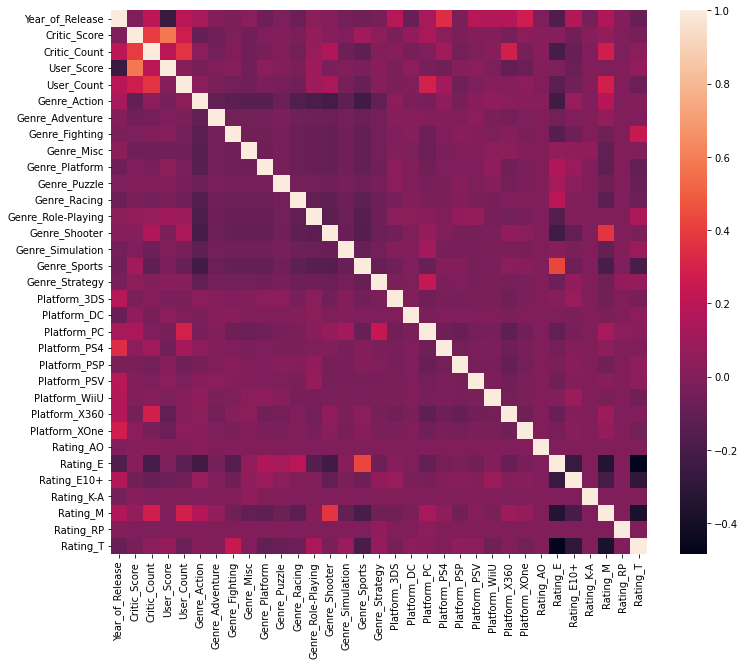

In [60]:
dummy_sales_scores.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_scores.corr());

There does not appear to be a strong corrilation between scores and specific genre's or platforms. There are very slight corrilations between Critic_Score and the Sports Genre, Critic_Score and PC games, and User_Score and Role-Playing games. For now we'll leave this and look at if we can determine a cut off for popularity of a game with either the score or the sales.

In [61]:
sales_and_scores.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

<AxesSubplot:>

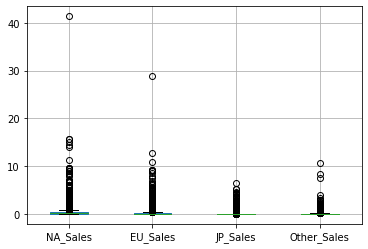

In [62]:
sales_and_scores.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

In [63]:
sales_and_scores.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


<AxesSubplot:>

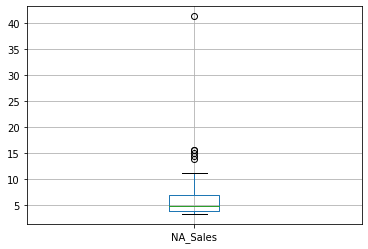

In [64]:
na_mean = sales_and_scores['NA_Sales'].mean()
na_std = sales_and_scores['NA_Sales'].std()
na_cut = na_mean + 3 * na_std

sales_and_scores[sales_and_scores['NA_Sales']>na_cut].boxplot(column=['NA_Sales'])


In [65]:
sales_and_scores[sales_and_scores['NA_Sales']>na_cut].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2007.302632,6.543684,3.813684,1.050921,1.306053,12.714079,86.434211,57.657895,7.647368,1292.460526
std,4.095590,5.083315,3.989738,1.494168,1.583078,10.755673,10.289588,26.366925,1.439025,1496.694878
min,1997.000000,3.360000,0.000000,0.000000,0.000000,4.120000,49.000000,10.000000,2.600000,16.000000
25%,2005.000000,3.910000,1.695000,0.060000,0.595000,6.670000,80.000000,32.250000,7.300000,133.500000
50%,2008.000000,4.935000,2.830000,0.270000,0.820000,9.880000,89.500000,62.500000,8.000000,686.500000
75%,2010.000000,7.025000,4.605000,1.607500,1.577500,13.995000,94.250000,81.000000,8.500000,2084.000000
max,2014.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,100.000000,9.200000,8713.000000


<AxesSubplot:>

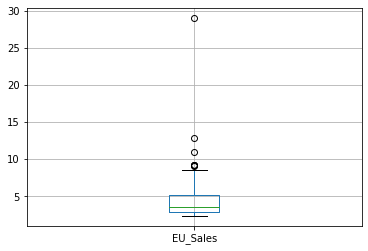

In [66]:
eu_mean = sales_and_scores['EU_Sales'].mean()
eu_std = sales_and_scores['EU_Sales'].std()
eu_cut = eu_mean + 3 * eu_std

sales_and_scores[sales_and_scores['EU_Sales']>eu_cut].boxplot(column=['EU_Sales'])


In [67]:
sales_and_scores[sales_and_scores['EU_Sales']>eu_cut].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,2008.48750,5.248625,4.606625,1.153000,1.328875,12.336250,85.762500,53.937500,7.307500,1285.075000
std,4.30188,5.587852,3.532864,1.597787,1.074894,10.523037,9.217819,23.120129,1.544429,1636.676331
min,1997.00000,0.080000,2.300000,0.000000,0.000000,3.520000,49.000000,10.000000,2.600000,16.000000
25%,2005.75000,1.985000,2.780000,0.080000,0.817500,6.807500,82.000000,37.000000,6.575000,146.750000
50%,2009.00000,3.770000,3.470000,0.245000,1.085000,9.605000,87.000000,56.000000,7.750000,629.000000
75%,2011.25000,6.782500,5.192500,1.937500,1.602500,13.520000,93.000000,72.250000,8.400000,1908.750000
max,2016.00000,41.360000,28.960000,6.500000,8.450000,82.530000,98.000000,113.000000,9.200000,8713.000000


<AxesSubplot:>

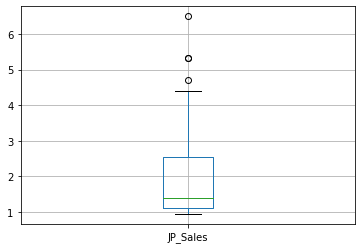

In [68]:
jp_mean = sales_and_scores['JP_Sales'].mean()
jp_std = sales_and_scores['JP_Sales'].std()
jp_cut = jp_mean + 3 * jp_std

sales_and_scores[sales_and_scores['JP_Sales']>jp_cut].boxplot(column=['JP_Sales'])

In [69]:
sales_and_scores[sales_and_scores['JP_Sales']>jp_cut].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,2005.652632,3.241789,2.436316,1.966842,0.757053,8.401579,83.368421,45.705263,8.290526,404.442105
std,4.680808,5.217759,3.868717,1.203088,1.326655,10.687764,8.681176,22.982358,0.816854,604.957475
min,1996.000000,0.000000,0.000000,0.940000,0.010000,1.260000,58.000000,4.000000,4.000000,4.000000
25%,2002.500000,0.630000,0.360000,1.100000,0.135000,2.825000,78.000000,25.000000,7.850000,56.500000
50%,2006.000000,1.850000,1.260000,1.390000,0.320000,5.290000,85.000000,45.000000,8.600000,190.000000
75%,2009.000000,3.600000,2.450000,2.535000,0.690000,9.035000,89.500000,65.000000,8.900000,461.000000
max,2015.000000,41.360000,28.960000,6.500000,8.450000,82.530000,97.000000,88.000000,9.300000,3994.000000


<AxesSubplot:>

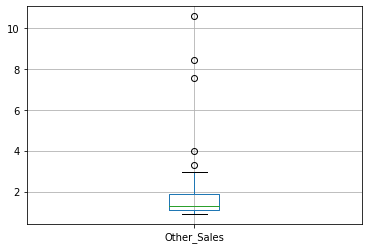

In [70]:
other_mean = sales_and_scores['Other_Sales'].mean()
other_std = sales_and_scores['Other_Sales'].std()
other_cut = other_mean + 3 * other_std

sales_and_scores[sales_and_scores['Other_Sales']>other_cut].boxplot(column=['Other_Sales'])

In [71]:
sales_and_scores[sales_and_scores['Other_Sales']>other_cut].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,2008.486486,5.374595,4.038784,0.971486,1.825000,12.209730,85.540541,52.472973,7.304054,1437.216216
std,3.797055,5.813725,4.088087,1.507267,1.605777,11.274189,8.978192,25.424733,1.580224,1810.488069
min,1997.000000,0.010000,0.000000,0.000000,0.900000,1.300000,58.000000,8.000000,2.600000,6.000000
25%,2006.000000,2.342500,2.215000,0.080000,1.082500,6.420000,82.000000,37.000000,6.425000,171.500000
50%,2008.000000,3.350000,3.275000,0.240000,1.290000,9.540000,87.000000,52.500000,7.850000,813.000000
75%,2011.000000,7.012500,5.127500,0.825000,1.880000,14.405000,92.750000,72.250000,8.400000,1995.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,105.000000,9.300000,8713.000000


<AxesSubplot:>

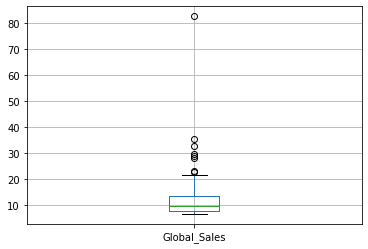

In [72]:
global_mean = sales_and_scores['Global_Sales'].mean()
global_std = sales_and_scores['Global_Sales'].std()
global_cut = global_mean + 3 * global_std

sales_and_scores[sales_and_scores['Global_Sales']>global_cut].boxplot(column=['Global_Sales'])

In [73]:
sales_and_scores[sales_and_scores['Global_Sales']>global_cut].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,2007.839506,5.975556,4.281481,1.333086,1.484568,13.073951,86.012346,56.135802,7.556790,1302.888889
std,4.512363,5.220472,3.673858,1.592230,1.645595,10.121300,9.826614,24.416569,1.498244,1481.120100
min,1997.000000,0.660000,0.010000,0.000000,0.080000,6.680000,49.000000,10.000000,2.600000,16.000000
25%,2005.000000,3.110000,2.350000,0.110000,0.690000,7.690000,82.000000,38.000000,7.200000,242.000000
50%,2009.000000,4.740000,3.270000,0.470000,1.060000,9.900000,88.000000,58.000000,8.000000,730.000000
75%,2011.000000,6.990000,5.090000,2.490000,1.690000,13.670000,94.000000,74.000000,8.500000,1854.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,100.000000,9.200000,8713.000000


<AxesSubplot:>

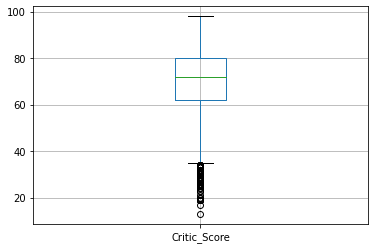

In [74]:
critic_mean = sales_and_scores['Critic_Score'].mean()
critic_std = sales_and_scores['Critic_Score'].std()
critic_cut = critic_mean + 3 * critic_std

sales_and_scores[sales_and_scores['Critic_Score']<critic_cut].boxplot(column=['Critic_Score'])

In [75]:
sales_and_scores[sales_and_scores['Critic_Score']<critic_cut].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


<AxesSubplot:>

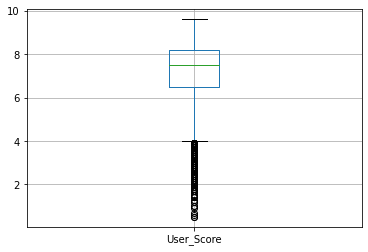

In [76]:
user_mean = sales_and_scores['User_Score'].mean()
user_std = sales_and_scores['User_Score'].std()
user_cut = user_mean + 3 * user_std

sales_and_scores[sales_and_scores['User_Score']<user_cut].boxplot(column=['User_Score'])

In [77]:
sales_and_scores[sales_and_scores['User_Score']<user_cut].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


So as you're reading this the above has the "greater than symbol" instead of the "less than", and you are welcome to switch the symbols so you can visualize what is being said now. The sales has many outliers and with the 75th percentile being significantly lower that the maximum value. However the Critic and User Scores had much better spreads. For the sake of curiosity I've swapped the </> symbols to see if there is anything of interest.

The cutoff values is set to 3 standard deviations above the mean, for each of the sales we are left with less than 100 games. We could argue that these are the most "popular" games. So I want to analyse if there is any corrilations among these games.

In [90]:
filtered = (vg_sales_2016_w_scores['NA_Sales']>na_cut) | (vg_sales_2016_w_scores['EU_Sales'] > eu_cut) | (vg_sales_2016_w_scores['JP_Sales'] > jp_cut) | (vg_sales_2016_w_scores['Other_Sales'] > other_cut) | (vg_sales_2016_w_scores['Global_Sales'] > global_cut)
most_pop_games = vg_sales_2016_w_scores[filtered]
most_pop_games.dropna(inplace=True)
most_pop_games.shape

C:\Users\ez\AppData\Local\Temp/ipykernel_9224/2962340706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_pop_games.dropna(inplace=True)


(190, 16)

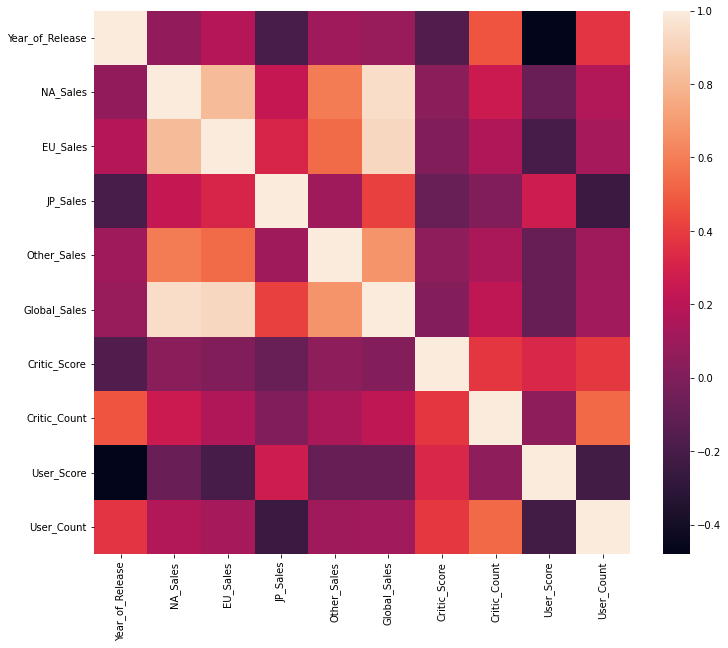

In [91]:
plt.subplots(figsize=(12,10))
sns.heatmap(most_pop_games.corr());

In our top video games we see a corrilation with User_Sores and sales in Japan, and we see that Critic and User Scores are still corrilated.

In [92]:
most_pop_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [93]:
dummy_popular = pd.get_dummies(most_pop_games, columns=['Genre','Platform', 'Rating'])
dummy_popular.shape

(190, 43)

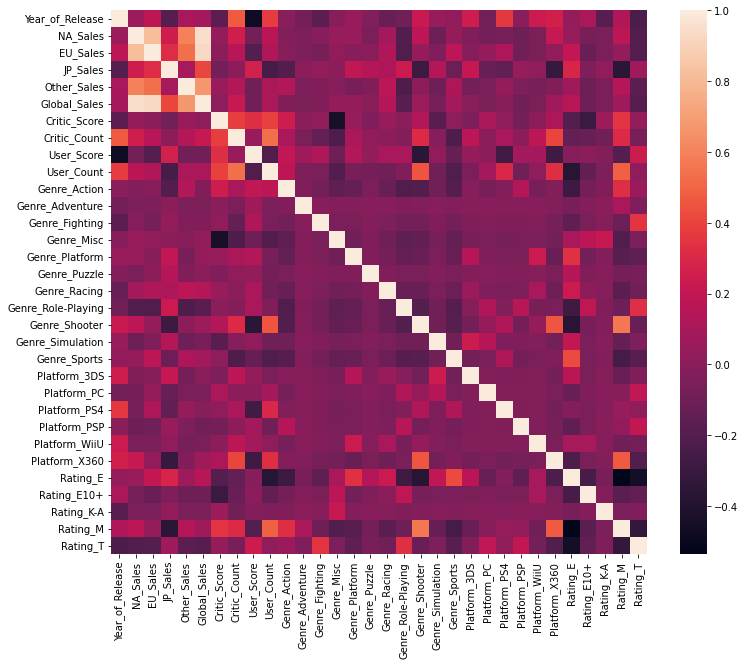

In [95]:
dummy_popular.drop(columns=['Platform_DS', 'Platform_GBA', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_Wii', 'Platform_XB', 'Platform_GC'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_popular.corr());

In [97]:
corr_matrix = dummy_popular.corr()
print(corr_matrix["Critic_Score"].sort_values(ascending=False))

Critic_Score          1.000000
User_Count            0.385335
Critic_Count          0.380671
Rating_M              0.346043
User_Score            0.322567
Genre_Action          0.242829
Genre_Shooter         0.140595
Platform_X360         0.118828
Platform_PC           0.109760
Rating_K-A            0.058535
Genre_Racing          0.051562
Other_Sales           0.048685
Genre_Platform        0.042358
Rating_T              0.039236
NA_Sales              0.034072
Platform_PS4          0.018343
Genre_Fighting        0.016645
Global_Sales          0.013817
Genre_Sports          0.010480
Platform_WiiU         0.006643
EU_Sales              0.004471
Genre_Role-Playing   -0.006195
Genre_Adventure      -0.006935
Genre_Puzzle         -0.040575
Platform_3DS         -0.046936
Platform_PSP         -0.074778
JP_Sales             -0.082896
Year_of_Release      -0.169687
Genre_Simulation     -0.179205
Rating_E             -0.198326
Rating_E10+          -0.296603
Genre_Misc           -0.438381
Name: Cr

In [98]:
print(corr_matrix["User_Score"].sort_values(ascending=False))

User_Score            1.000000
Critic_Score          0.322567
JP_Sales              0.265735
Rating_T              0.234238
Genre_Action          0.194099
Genre_Platform        0.136446
Genre_Fighting        0.128537
Genre_Racing          0.102433
Genre_Role-Playing    0.101871
Platform_WiiU         0.089048
Platform_PSP          0.083687
Genre_Adventure       0.066990
Critic_Count          0.051313
Platform_3DS          0.037680
Genre_Puzzle          0.030552
Genre_Simulation      0.024536
Rating_E10+           0.008516
Platform_PC           0.005660
Rating_E             -0.019106
Rating_K-A           -0.024292
NA_Sales             -0.081158
Global_Sales         -0.088507
Other_Sales          -0.089653
Genre_Misc           -0.108566
Genre_Sports         -0.131851
Rating_M             -0.194828
EU_Sales             -0.199448
User_Count           -0.216122
Platform_PS4         -0.269397
Platform_X360        -0.278305
Genre_Shooter        -0.363096
Year_of_Release      -0.480297
Name: Us

In [99]:
print(corr_matrix["Global_Sales"].sort_values(ascending=False))

Global_Sales          1.000000
NA_Sales              0.947455
EU_Sales              0.923798
Other_Sales           0.675841
JP_Sales              0.411635
Critic_Count          0.215658
Rating_E              0.154702
Genre_Racing          0.143225
User_Count            0.113038
Genre_Sports          0.085289
Year_of_Release       0.084651
Rating_M              0.074157
Platform_X360         0.066617
Genre_Shooter         0.058255
Genre_Platform        0.039083
Genre_Misc            0.029381
Critic_Score          0.013817
Platform_3DS         -0.005106
Genre_Puzzle         -0.006404
Platform_PS4         -0.009044
Genre_Action         -0.032601
Genre_Fighting       -0.035427
Genre_Adventure      -0.051518
Platform_WiiU        -0.053827
Rating_K-A           -0.054510
Platform_PC          -0.054787
Genre_Simulation     -0.063693
Platform_PSP         -0.087871
User_Score           -0.088507
Rating_E10+          -0.104765
Genre_Role-Playing   -0.187359
Rating_T             -0.190704
Name: Gl

In [101]:
most_pop_games['Year_of_Release'].describe()

count     190.000000
mean     2006.989474
std         4.549539
min      1996.000000
25%      2004.000000
50%      2007.000000
75%      2010.000000
max      2016.000000
Name: Year_of_Release, dtype: float64

Looking at our "most popular" games we see some more corralations. The most interesting to note, while still not highly corralted are: Critic and Action, Critic and Shooter, User and Action, User and Platform, User and Fighting, User and Racing, User and Roleplaying, 

According to History.com the "Modern Age of Gaming" started around 2005, let's see if cutting off at 2000 will effect any of our correlations.

C:\Users\ez\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

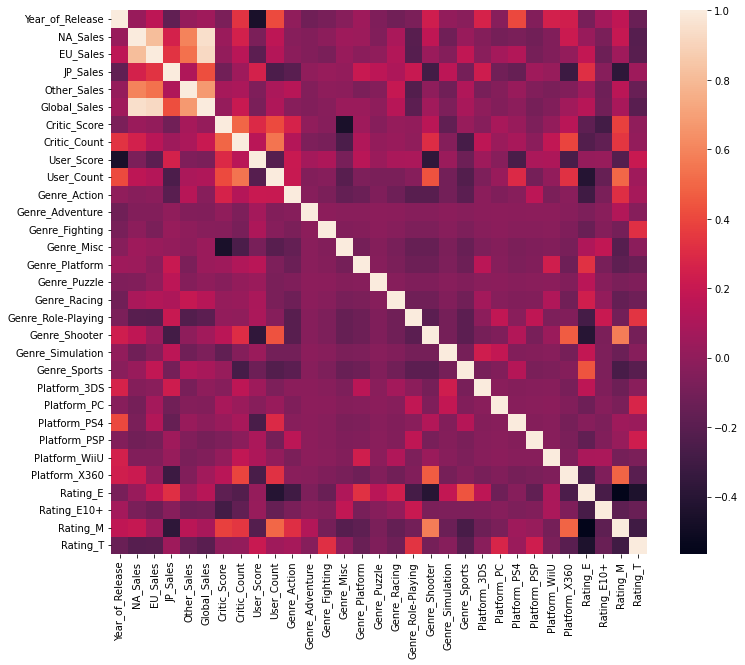

In [110]:
modern_most_pop = dummy_popular[dummy_popular['Year_of_Release']>=2000]
modern_most_pop.drop(columns='Rating_K-A', inplace=True)
modern_corr = modern_most_pop.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(modern_corr)

In [114]:
print(modern_corr["User_Score"].sort_values(ascending=False))

User_Score            1.000000
Critic_Score          0.294859
JP_Sales              0.258278
Rating_T              0.207487
Genre_Action          0.205505
Critic_Count          0.146734
Genre_Platform        0.146526
Genre_Fighting        0.101420
Platform_WiiU         0.101420
Platform_PSP          0.098150
Genre_Role-Playing    0.096453
Genre_Racing          0.093205
Genre_Adventure       0.073793
Platform_3DS          0.051664
Genre_Puzzle          0.039768
Genre_Simulation      0.039025
Rating_E10+           0.027253
Rating_E              0.019006
Platform_PC          -0.028529
Other_Sales          -0.063495
NA_Sales             -0.075366
Global_Sales         -0.080635
Genre_Misc           -0.087735
Genre_Sports         -0.129078
EU_Sales             -0.191777
User_Count           -0.211265
Rating_M             -0.218294
Platform_X360        -0.262638
Platform_PS4         -0.264455
Genre_Shooter        -0.369667
Year_of_Release      -0.456214
Name: User_Score, dtype: float64


This appears to be much of the same information as we had without cutting off by years, we will leave this data set for now, and work on the next one.